In [ ]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install seaborn
%pip install scipy

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'c:\\Users\\Diego Alejandro\\Documents\\Univalle_fisio\\Proyecto_plataforma\\opencap-processing\\Examples\\ForcePlateIntegration\\up_drive\\.venv\\Lib\\site-packages\\numpy\\_core\\tests\\test_indexing.py'
Check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, friedmanchisquare, shapiro

In [4]:
df = pd.read_excel('S60_GFR.xlsx')
df

,participante,F1TIME,F1-RODSAGITAL D,F1-GFRD,F1-RODSAGITAL I,F1-GFRI,F1-GFRT,F2TIME,F2-RODSAGITAL D,F2-GFRD,F2-RODSAGITAL I,F2-GFRI,F2-GFRT,F3TIME,F3-RODSAGITAL D,F3-GFRD,F3-RODSAGITAL I,F3-GFRI,F3-GFRT
0,P1,8.267,8.020,0.507,8.806,0.516,1.023,12.000,84.257,0.500,83.259,0.517,1.023,15.733,5.252,0.485,6.231,0.531,1.023
1,P2,4.067,8.193,0.398,6.313,0.557,0.955,6.750,66.474,0.513,65.656,0.492,0.955,9.433,4.784,0.531,5.575,0.467,0.955
2,P3,6.650,0.000,0.415,7.131,0.557,0.972,10.367,65.317,0.536,69.770,0.472,0.972,14.100,17.350,0.472,16.137,0.514,0.972
3,P4,4.867,5.349,0.539,7.618,0.520,1.059,8.000,49.061,0.599,57.150,0.482,1.059,11.133,3.796,0.584,7.828,0.454,1.059
4,P5,5.017,13.071,0.514,11.363,0.450,0.964,8.017,89.205,0.518,89.237,0.510,0.964,11.033,8.329,0.510,5.649,0.484,0.964
5,P6,6.833,15.190,0.540,8.385,0.464,1.004,10.283,88.950,0.498,88.140,0.498,1.004,13.750,20.583,0.495,14.182,0.498,1.004
6,P7,5.550,16.209,0.497,8.052,0.469,0.966,8.850,81.195,0.528,80.103,0.476,0.966,12.167,10.396,0.508,5.238,0.508,0.966
7,P8,3.917,5.192,0.944,6.004,0.120,1.063,7.400,55.355,0.581,61.882,0.450,1.063,10.900,4.177,0.504,4.947,0.518,1.063
8,P9,5.383,10.534,0.462,15.403,0.516,0.978,8.000,73.882,0.526,76.703,0.464,0.978,10.617,15.445,0.482,13.153,0.509,0.978
9,P10,5.950,6.586,0.491,6.698,0.457,0.948,8.350,69.282,0.548,70.212,0.477,0.948,10.750,10.376,0.561,12.163,0.459,0.948


In [5]:
df_long_rod = df.melt(id_vars='participante', value_vars=['F1-RODSAGITAL D', 'F2-RODSAGITAL D', 'F3-RODSAGITAL D'],
                      var_name='fase', value_name='RODSAGITAL_D')
df_long_rod['fase'] = df_long_rod['fase'].str.extract(r'(F\d)')

df_long_gfr = df.melt(id_vars='participante', value_vars=['F1-GFRD', 'F2-GFRD', 'F3-GFRD'],
                      var_name='fase', value_name='GFRD')
df_long_gfr['fase'] = df_long_gfr['fase'].str.extract(r'(F\d)')

df_long_rod_i = df.melt(id_vars='participante', value_vars=['F1-RODSAGITAL I', 'F2-RODSAGITAL I', 'F3-RODSAGITAL I'],
                      var_name='fase', value_name='RODSAGITAL_I')
df_long_rod_i['fase'] = df_long_rod_i['fase'].str.extract(r'(F\d)')

df_long_gfr_i = df.melt(id_vars='participante', value_vars=['F1-GFRI', 'F2-GFRI', 'F3-GFRI'],
                      var_name='fase', value_name='GFRI')
df_long_gfr_i['fase'] = df_long_gfr_i['fase'].str.extract(r'(F\d)')

df_long_gfr_t = df.melt(id_vars='participante', value_vars=['F1-GFRT', 'F2-GFRT', 'F3-GFRT'],
                      var_name='fase', value_name='GFRT')
df_long_gfr_t['fase'] = df_long_gfr_i['fase'].str.extract(r'(F\d)')

df_merged = pd.merge(df_long_rod, df_long_gfr, on=['participante', 'fase'])
df_merged = pd.merge(df_merged, df_long_rod_i, on=['participante', 'fase'])
df_merged = pd.merge(df_merged, df_long_gfr_i, on=['participante', 'fase'])
df_merged = pd.merge(df_merged, df_long_gfr_t, on=['participante', 'fase'])
df_merged

,participante,fase,RODSAGITAL_D,GFRD,RODSAGITAL_I,GFRI,GFRT
0,P1,F1,8.020,0.507,8.806,0.516,1.023
1,P2,F1,8.193,0.398,6.313,0.557,0.955
2,P3,F1,0.000,0.415,7.131,0.557,0.972
3,P4,F1,5.349,0.539,7.618,0.520,1.059
4,P5,F1,13.071,0.514,11.363,0.450,0.964
...,...,...,...,...,...,...,...
85,P26,F3,9.544,0.433,0.000,0.513,0.910
86,P27,F3,2.175,0.544,0.266,0.487,1.008
87,P28,F3,5.957,0.541,5.183,0.440,0.978
88,P29,F3,7.668,0.465,0.000,0.512,0.934


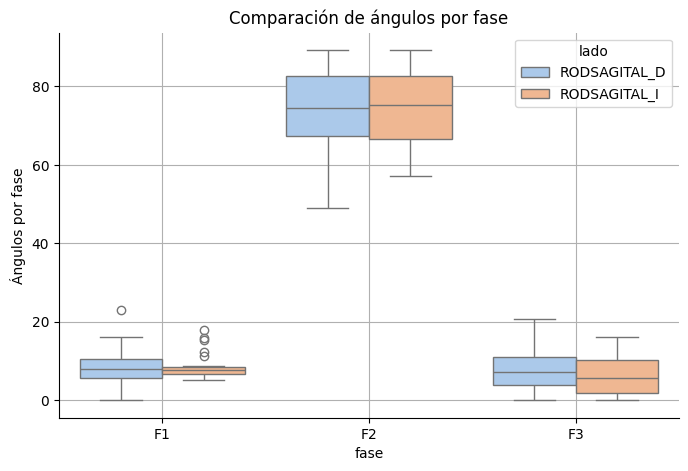

In [6]:
df_long = df_merged.melt(id_vars=["participante", "fase"], 
                         value_vars=["RODSAGITAL_D", "RODSAGITAL_I"], 
                         var_name="lado", value_name="Ángulos por fase",)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x="fase", y="Ángulos por fase", hue="lado",palette="pastel", linewidth=1)
plt.title("Comparación de ángulos por fase")
sns.despine()

plt.grid(True)
plt.show()


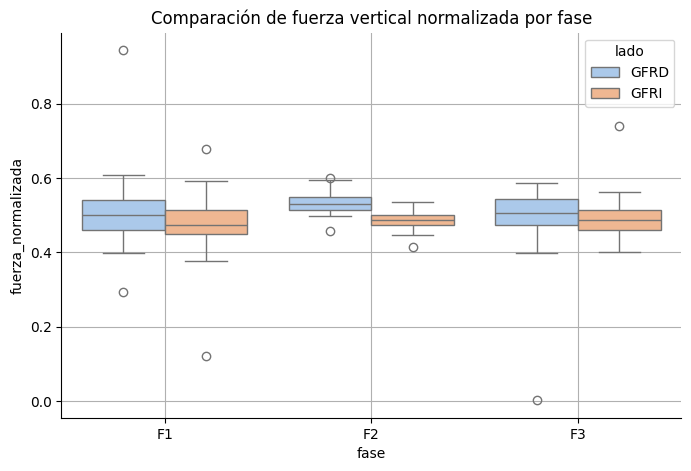

In [7]:
df_long = df_merged.melt(id_vars=["participante", "fase"], 
                         value_vars=["GFRD", "GFRI"], 
                         var_name="lado", value_name="fuerza_normalizada",)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x="fase", y="fuerza_normalizada", hue="lado",palette="pastel", linewidth=1)
plt.title("Comparación de fuerza vertical normalizada por fase")
sns.despine()

plt.grid(True)
plt.show()


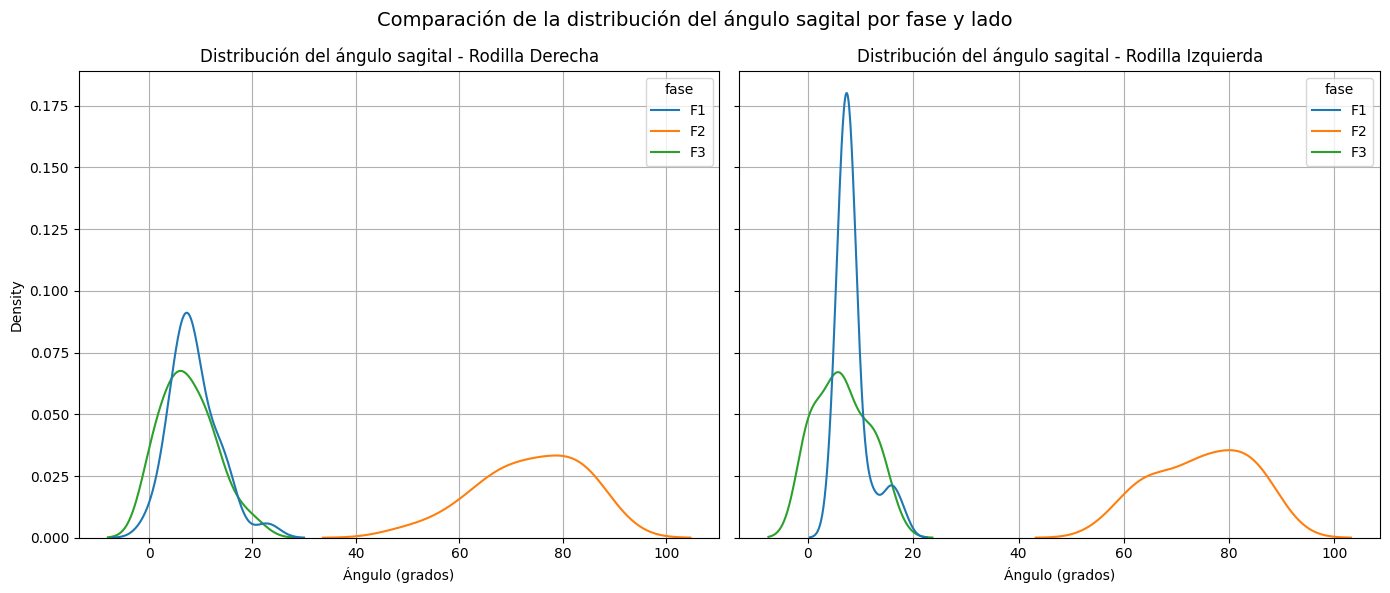

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Rodilla derecha
sns.kdeplot(data=df_merged, x="RODSAGITAL_D", hue="fase", common_norm=False, ax=ax1)
ax1.set_title("Distribución del ángulo sagital - Rodilla Derecha")
ax1.set_xlabel("Ángulo (grados)")
ax1.grid(True)

# Rodilla izquierda
sns.kdeplot(data=df_merged, x="RODSAGITAL_I", hue="fase", common_norm=False, ax=ax2)
ax2.set_title("Distribución del ángulo sagital - Rodilla Izquierda")
ax2.set_xlabel("Ángulo (grados)")
ax2.grid(True)

plt.suptitle("Comparación de la distribución del ángulo sagital por fase y lado", fontsize=14)
plt.tight_layout()
plt.show()


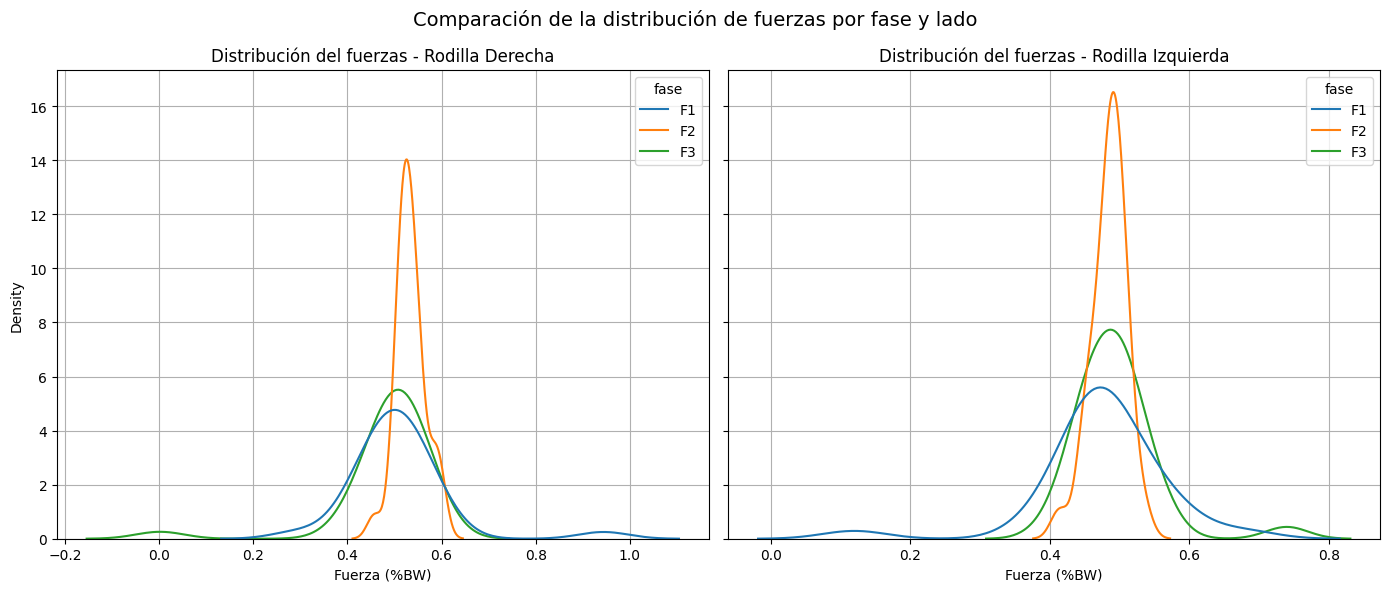

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Rodilla derecha
sns.kdeplot(data=df_merged, x="GFRD", hue="fase", common_norm=False, ax=ax1)
ax1.set_title("Distribución del fuerzas - Rodilla Derecha")
ax1.set_xlabel("Fuerza (%BW)")
ax1.grid(True)

# Rodilla izquierda
sns.kdeplot(data=df_merged, x="GFRI", hue="fase", common_norm=False, ax=ax2)
ax2.set_title("Distribución del fuerzas - Rodilla Izquierda")
ax2.set_xlabel("Fuerza (%BW)")
ax2.grid(True)

plt.suptitle("Comparación de la distribución de fuerzas por fase y lado", fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
# Correlación Pearson (lineal)
corr_r_d = df_merged['RODSAGITAL_D'].corr(df_merged['GFRD'], method='pearson')
corr_r_i = df_merged['RODSAGITAL_I'].corr(df_merged['GFRI'], method='pearson')

print(f"Correlación Pearson Rodilla Derecha: {corr_r_d:.2f}")
print(f"Correlación Pearson Rodilla Izquierda: {corr_r_i:.2f}")
# Correlación Spearman (monótona)
corr_s_d = df_merged['RODSAGITAL_D'].corr(df_merged['GFRD'], method='spearman')
corr_s_i = df_merged['RODSAGITAL_I'].corr(df_merged['GFRI'], method='spearman')
print(f"Correlación Spearman Rodilla Derecha: {corr_s_d:.2f}")
print(f"Correlación Pearson Rodilla Izquierda: {corr_r_i:.2f}")

Correlación Pearson Rodilla Derecha: 0.16
Correlación Pearson Rodilla Izquierda: 0.01
Correlación Spearman Rodilla Derecha: 0.11
Correlación Pearson Rodilla Izquierda: 0.01


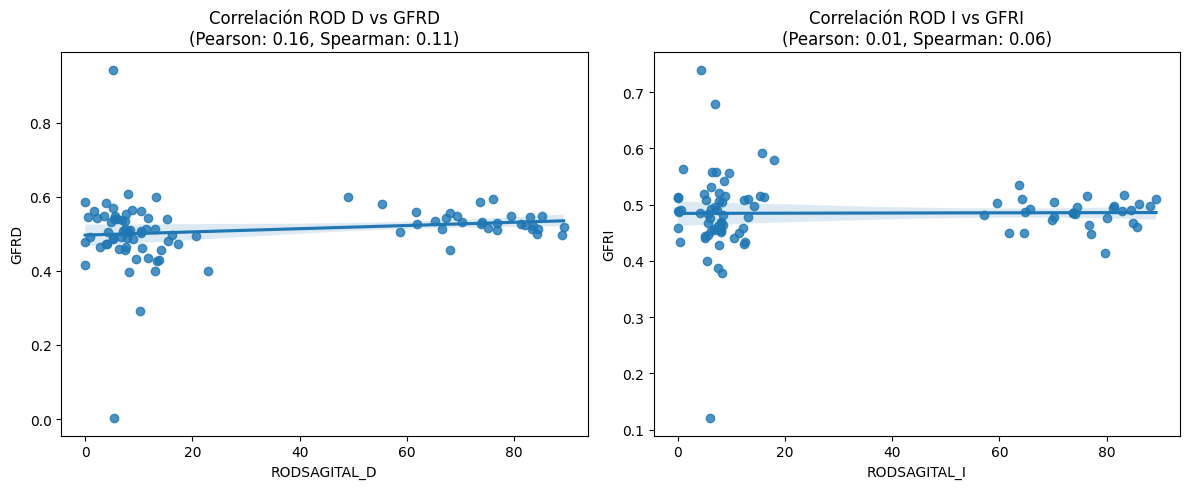

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=df_merged, x='RODSAGITAL_D', y='GFRD', ax=ax1)
ax1.set_title(f'Correlación ROD D vs GFRD\n(Pearson: {corr_r_d:.2f}, Spearman: {corr_s_d:.2f})')

sns.regplot(data=df_merged, x='RODSAGITAL_I', y='GFRI', ax=ax2)
ax2.set_title(f'Correlación ROD I vs GFRI\n(Pearson: {corr_r_i:.2f}, Spearman: {corr_s_i:.2f})')

plt.tight_layout()
plt.show()


In [12]:
for fase in ['F1', 'F2', 'F3']:
    subset = df_merged[df_merged['fase'] == fase]
    corr = subset['RODSAGITAL_D'].corr(subset['GFRD'])
    print(f"Correlación RODD vs GFRD en {fase}: {corr:.2f}")


Correlación RODD vs GFRD en F1: -0.19
Correlación RODD vs GFRD en F2: -0.38
Correlación RODD vs GFRD en F3: -0.14


In [72]:
df.columns

Index(['participante', 'F1TIME', 'F1-RODSAGITAL D', 'F1-GFRD',
       'F1-RODSAGITAL I', 'F1-GFRI', 'F1-GFRT', 'F2TIME', 'F2-RODSAGITAL D',
       'F2-GFRD', 'F2-RODSAGITAL I', 'F2-GFRI', 'F2-GFRT', 'F3TIME',
       'F3-RODSAGITAL D', 'F3-GFRD', 'F3-RODSAGITAL I', 'F3-GFRI', 'F3-GFRT'],
      dtype='object')

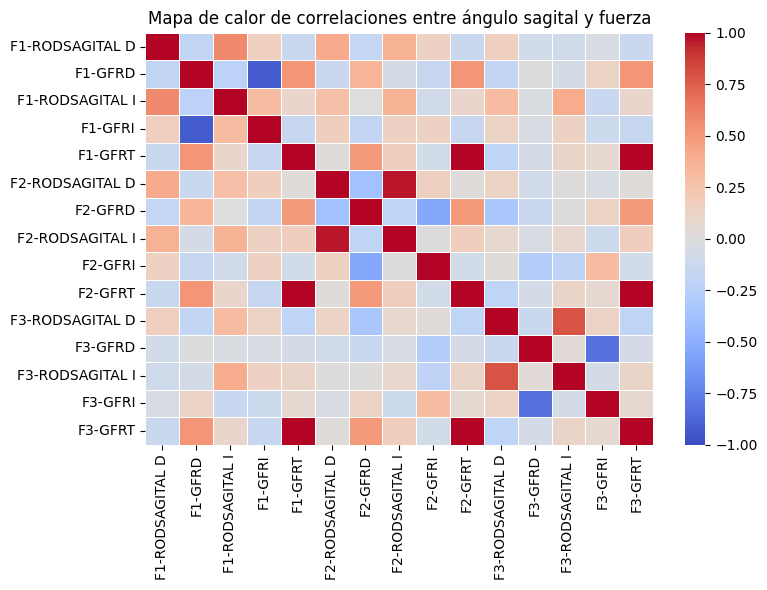

In [13]:
df_corr = df[['F1-RODSAGITAL D', 'F1-GFRD','F1-RODSAGITAL I', 'F1-GFRI', 'F1-GFRT', 'F2-RODSAGITAL D',
       'F2-GFRD', 'F2-RODSAGITAL I', 'F2-GFRI', 'F2-GFRT',
       'F3-RODSAGITAL D', 'F3-GFRD', 'F3-RODSAGITAL I', 'F3-GFRI', 'F3-GFRT']]
corr_matrix = df_corr.corr(numeric_only=True)

# Visualizar como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre ángulo sagital y fuerza")
plt.tight_layout()
plt.show()

In [78]:
%pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


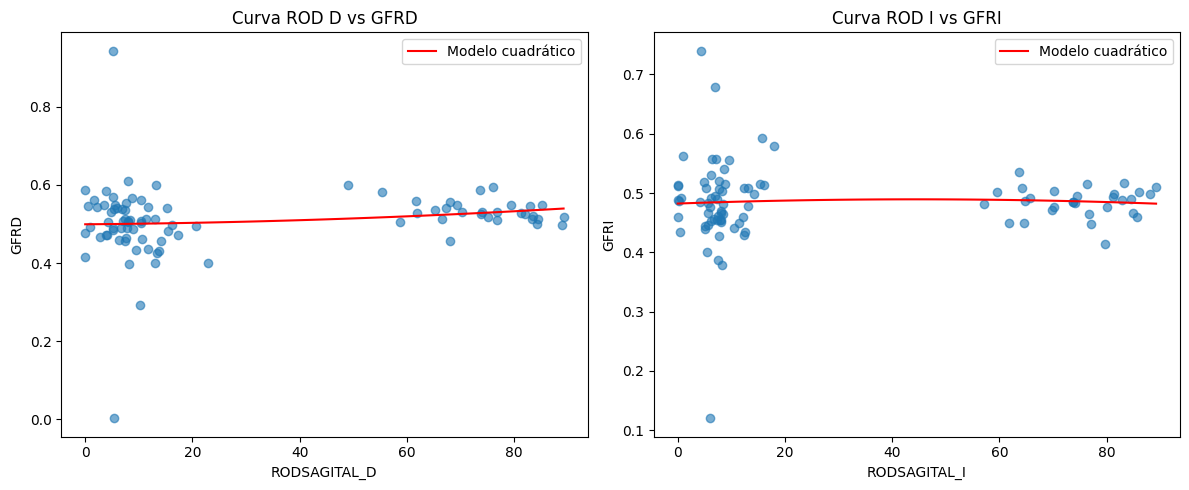

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import io

# Eliminar filas con NaNs
df_clean = df_merged.dropna(subset=["RODSAGITAL_D", "GFRD", "RODSAGITAL_I", "GFRI"])

# Ajustar un modelo polinómico de segundo orden para cada lado
X_d = df_clean["RODSAGITAL_D"].values.reshape(-1, 1)
y_d = df_clean["GFRD"].values

X_i = df_clean["RODSAGITAL_I"].values.reshape(-1, 1)
y_i = df_clean["GFRI"].values

# Crear variables polinómicas (cuadráticas)
poly = PolynomialFeatures(degree=2)
X_poly_d = poly.fit_transform(X_d)
X_poly_i = poly.fit_transform(X_i)

# Ajustar modelos
model_d = LinearRegression().fit(X_poly_d, y_d)
model_i = LinearRegression().fit(X_poly_i, y_i)

# Generar predicciones para visualización
x_vals_d = np.linspace(X_d.min(), X_d.max(), 100).reshape(-1, 1)
x_vals_poly_d = poly.transform(x_vals_d)
y_pred_d = model_d.predict(x_vals_poly_d)

x_vals_i = np.linspace(X_i.min(), X_i.max(), 100).reshape(-1, 1)
x_vals_poly_i = poly.transform(x_vals_i)
y_pred_i = model_i.predict(x_vals_poly_i)

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Rodilla derecha
ax1.scatter(df_clean["RODSAGITAL_D"], df_clean["GFRD"], alpha=0.6)
ax1.plot(x_vals_d, y_pred_d, color='red', label="Modelo cuadrático")
ax1.set_title("Curva ROD D vs GFRD")
ax1.set_xlabel("RODSAGITAL_D")
ax1.set_ylabel("GFRD")
ax1.legend()

# Rodilla izquierda
ax2.scatter(df_clean["RODSAGITAL_I"], df_clean["GFRI"], alpha=0.6)
ax2.plot(x_vals_i, y_pred_i, color='red', label="Modelo cuadrático")
ax2.set_title("Curva ROD I vs GFRI")
ax2.set_xlabel("RODSAGITAL_I")
ax2.set_ylabel("GFRI")
ax2.legend()

plt.tight_layout()
plt.show()


In [27]:
%pip install statsmodels adjustText

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


7 [-0.30068748 -0.08688029]
8 [ 0.98623358 -0.97612438]
9 [-0.45152667 -0.99903833]


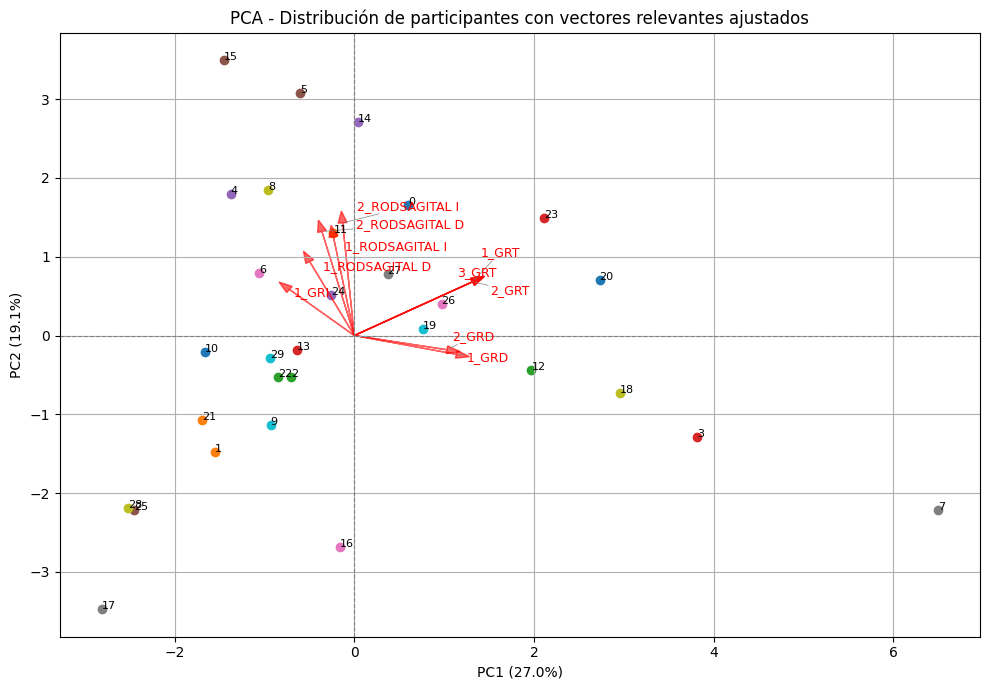

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Selecciona variables numéricas
features = ['F1-RODSAGITAL D', 'F2-RODSAGITAL D', 'F3-RODSAGITAL D',
            'F1-RODSAGITAL I', 'F2-RODSAGITAL I', 'F3-RODSAGITAL I',
            'F1-GFRD', 'F2-GFRD', 'F3-GFRD', 'F1-GFRI', 'F2-GFRI', 'F3-GFRI',
            'F1-GFRT', 'F2-GFRT', 'F3-GFRT']

# Normaliza los datos
# Selección de características numéricas

X = df[features]

# Estandarizar
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
loadings = pca.components_.T
explained_var = pca.explained_variance_ratio_

# Cálculo de norma de los vectores (para filtrar los más relevantes)
norms = np.linalg.norm(loadings, axis=1)
top_indices = np.argsort(norms)[-10:]  # top 10 vectores

# Plot
# Nueva figura con textos desplazados y líneas guía
plt.figure(figsize=(10, 7))
for i, participant in enumerate(df.index):
    plt.scatter(X_pca[i, 0], X_pca[i, 1])
    plt.text(X_pca[i, 0], X_pca[i, 1], participant, fontsize=8)

# Añadir vectores y etiquetas desplazadas
texts = []
for i in top_indices:
    vector = loadings[i]
    x, y = vector[0]*3, vector[1]*3
    plt.arrow(0, 0, x, y, color='red', alpha=0.6, head_width=0.1)
    text = plt.text(x, y, features[i].replace("F", "").replace("-", "_"), 
                    color='red', fontsize=9)
    texts.append(text)

# Ajustar etiquetas y agregar líneas grises
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Ejes guía
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
plt.title("PCA - Distribución de participantes con vectores relevantes ajustados")
plt.grid(True)
plt.tight_layout()
plt.show()

Análisis de Componentes Principales (PCA) - Distribución de Participantes con Vectores Relevantes
El gráfico de PCA presentado muestra la distribución de los participantes en el espacio definido por las dos primeras componentes principales (PC1 y PC2), que explican conjuntamente un 46.1% de la varianza total (PC1: 27.0%, PC2: 19.1%). Cada punto representa a un participante, etiquetado con su identificador, y codificado por color para facilitar su distinción.

Los vectores rojos representan las variables biomecánicas más relevantes (top 10 en contribución) que influyen en la separación de los datos. Estas variables incluyen principalmente ángulos sagitales de la rodilla (RODSAGITAL) y fuerzas verticales normalizadas (GFR) durante distintas fases del movimiento (F1, F2, F3).

Hallazgos clave:
Las variables RODSAGITAL (especialmente de la fase F2) son las que más contribuyen a la variación explicada en el gráfico, apuntando hacia el cuadrante superior izquierdo.

Participantes que se alinean en la dirección de ciertos vectores tienden a presentar valores más altos en esas variables. Por ejemplo, los participantes hacia la derecha (como P7 o P3) están más influenciados por variables como F2-GFRD.

La dispersión general sugiere que existen patrones individuales distintivos, aunque no hay agrupamientos claros por fase, lo que indica una alta variabilidad interindividual.

Conclusión:
Este análisis revela que el ángulo sagital de la rodilla es un factor determinante en la variabilidad biomecánica observada durante las fases del ejercicio. Aunque las fuerzas verticales son relevantes en términos funcionales, no parecen diferenciar significativamente a los participantes a nivel estadístico ni estructural en este espacio reducido.

In [ ]:
%pip install statsmodels

In [16]:
from statsmodels.stats.anova import AnovaRM

# Variables a analizar (pares variable, nombre_columna)
variables = {
    "RODSAGITAL_D": ['F1-RODSAGITAL D', 'F2-RODSAGITAL D', 'F3-RODSAGITAL D'],
    "RODSAGITAL_I": ['F1-RODSAGITAL I', 'F2-RODSAGITAL I', 'F3-RODSAGITAL I'],
    "GFRD": ['F1-GFRD', 'F2-GFRD', 'F3-GFRD'],
    "GFRI": ['F1-GFRI', 'F2-GFRI', 'F3-GFRI'],
    "GFRT": ['F1-GFRT', 'F2-GFRT', 'F3-GFRT'],
}

anova_results = {}

# Ejecutar ANOVA para cada variable
for var_name, cols in variables.items():
    df_long = df.melt(id_vars='participante', value_vars=cols, var_name='fase', value_name=var_name)
    df_long['fase'] = df_long['fase'].str.extract(r'(F\d)')
    
    try:
        result = AnovaRM(df_long, depvar=var_name, subject='participante', within=['fase']).fit()
        anova_results[var_name] = result.anova_table['Pr > F'][0]
    except Exception as e:
        anova_results[var_name] = f"Error: {str(e)}"

# Mostrar resultados
dataframe=pd.DataFrame.from_dict(anova_results, orient='index', columns=["p-value"])

dataframe

C:\Users\Diego Alejandro\AppData\Local\Temp\ipykernel_21088\1516988360.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[var_name] = result.anova_table['Pr > F'][0]
C:\Users\Diego Alejandro\AppData\Local\Temp\ipykernel_21088\1516988360.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[var_name] = result.anova_table['Pr > F'][0]
C:\Users\Diego Alejandro\AppData\Local\Temp\ipykernel_21088\1516988360.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

,p-value
RODSAGITAL_D,2.728254e-46
RODSAGITAL_I,8.116922e-50
GFRD,1.204564e-01
GFRI,5.062054e-01
GFRT,1.000000e+00


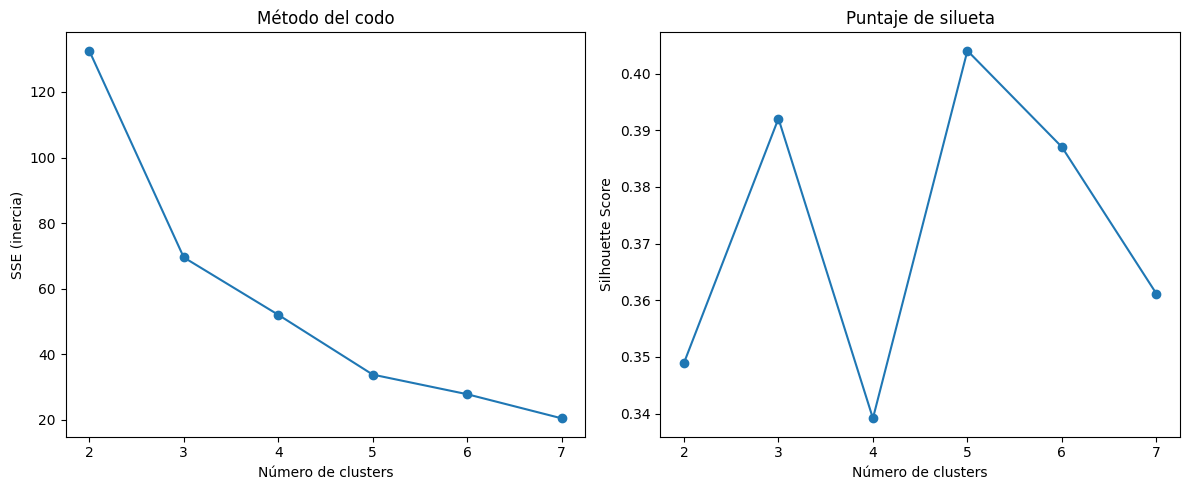

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Usamos las mismas componentes principales generadas previamente
X = X_pca  # Ya calculado con PCA

# Determinar el número óptimo de clusters usando el método del codo y la silueta
sse = []
silhouette = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Graficar método del codo y silueta
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(K_range, sse, marker='o')
ax[0].set_title('Método del codo')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('SSE (inercia)')

ax[1].plot(K_range, silhouette, marker='o')
ax[1].set_title('Puntaje de silueta')
ax[1].set_xlabel('Número de clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

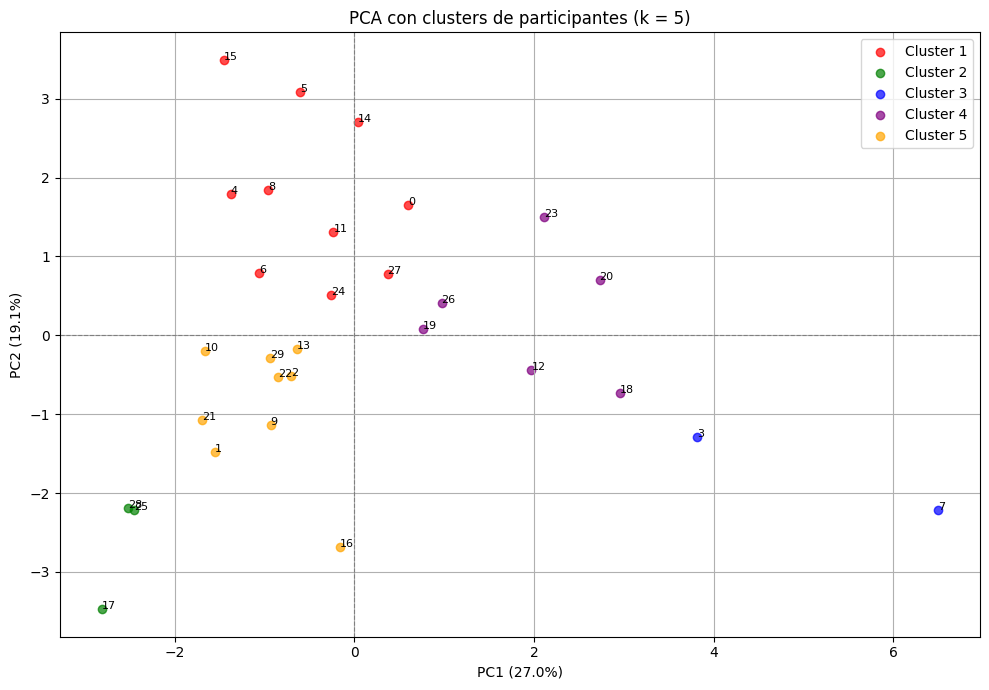

In [22]:
# Ajustar KMeans con k=4 clusters
k=5
kmeans_final = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_final.fit_predict(X_pca)

# Graficar PCA con clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(k):
    cluster_points = X_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                label=f'Cluster {i+1}', alpha=0.7, color=colors[i])

# Etiquetas de participantes
for i, participant in enumerate(df.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], participant, fontsize=8)

# Ejes y título
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
plt.title(f"PCA con clusters de participantes (k = {k})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
